# Relevant Title for Zillow Data Nerds

In [9]:
# imports

# SQL imports
from sqlalchemy import create_engine
from env import user, pw, host

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

Using the SQL zillow schema, write a query via Python to generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`

### Read the data

In [10]:
full_df1 = pd.read_csv('~/Zillow/properties_2016.csv')
full_df2 = pd.read_csv('~/Zillow/train_2016_v2.csv')

In [11]:
full_df1.shape
full_df1.parcelid.nunique()

2985217

### Flatten down to only entries that have a valid logerror

In [12]:
df4 = full_df1.merge(full_df2, on='parcelid',how='inner')
df4.shape

(90275, 60)

In [13]:
df5 = df4.drop_duplicates(subset='parcelid', keep='first', inplace=False)
df5.shape

(90150, 60)

In [14]:
df = df5

In [15]:
df.shape

(90150, 60)

### Explore all columns

In [16]:
df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

### Trim columns down to project's scope

### New dataframe within project's scope

In [17]:
a_df = df[['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',\
           'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']]

In [18]:
a_df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
0,0.0953,2.5,3.0,1264.0,2.0,2.0,5.0,1986.0,191811.0,2015.06
1,0.0198,1.0,2.0,777.0,1.0,1.0,4.0,1990.0,239679.0,2581.30
2,0.0060,2.0,3.0,1101.0,2.0,2.0,5.0,1956.0,47853.0,591.64
3,-0.0566,1.5,2.0,1554.0,1.0,2.0,5.0,1965.0,62914.0,682.78
4,0.0573,2.5,4.0,2415.0,2.0,2.0,8.0,1984.0,554000.0,5886.92


### Check for null values

In [19]:
a_df.isnull().sum()

logerror                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      658
fullbathcnt                      1176
garagecarcnt                    60253
roomcnt                             0
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
dtype: int64

### Dropping garagecarcnt since ~67% do not have values

In [20]:
a_df = a_df.drop(columns=['garagecarcnt'])

In [21]:
a_df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
0,0.0953,2.5,3.0,1264.0,2.0,5.0,1986.0,191811.0,2015.06
1,0.0198,1.0,2.0,777.0,1.0,4.0,1990.0,239679.0,2581.30
2,0.0060,2.0,3.0,1101.0,2.0,5.0,1956.0,47853.0,591.64
3,-0.0566,1.5,2.0,1554.0,1.0,5.0,1965.0,62914.0,682.78
4,0.0573,2.5,4.0,2415.0,2.0,8.0,1984.0,554000.0,5886.92


### Handle nulls

In [22]:
b_df = a_df.dropna(axis='rows')

In [23]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88879 entries, 0 to 90274
Data columns (total 9 columns):
logerror                        88879 non-null float64
bathroomcnt                     88879 non-null float64
bedroomcnt                      88879 non-null float64
calculatedfinishedsquarefeet    88879 non-null float64
fullbathcnt                     88879 non-null float64
roomcnt                         88879 non-null float64
yearbuilt                       88879 non-null float64
taxvaluedollarcnt               88879 non-null float64
taxamount                       88879 non-null float64
dtypes: float64(9)
memory usage: 6.8 MB


In [24]:
b_df.isnull().sum()

logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
dtype: int64

In [25]:
b_df.shape

(88879, 9)

### Removing roomcnt as there is too many with a value of 0 as well as it's an aggregate of bedrooms/baths

In [26]:
df_roomcnt = b_df[['roomcnt']]
b_df = b_df.drop(columns=('roomcnt'))

In [27]:
df = b_df

### Data Summary

In [28]:

def summarize_df(df):
    print("Summary of Data\n")
    print("Rows & Columns:\n")
    print(df.shape)
    print("Variables:\n")
    var_names = df.columns.values
    print(var_names)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nNumeric Summary Stats:\n")
    print(df.describe())
    print("\nTop 5 Values:\n")
    for var in var_names:
        print(var+":")
        print(df[var].value_counts().head())
        print('\n')
    print("\nMissing Values:\n")
    null_counts = df.isnull().sum()
    if len(null_counts[null_counts > 0]) == 0:
        print("No missing values")
    else:
        print(null_counts[null_counts > 0])
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nEnd of Summary")

In [29]:
summarize_df(df)

Summary of Data

Rows & Columns:

(88879, 8)
Variables:

['logerror' 'bathroomcnt' 'bedroomcnt' 'calculatedfinishedsquarefeet'
 'fullbathcnt' 'yearbuilt' 'taxvaluedollarcnt' 'taxamount']

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88879 entries, 0 to 90274
Data columns (total 8 columns):
logerror                        88879 non-null float64
bathroomcnt                     88879 non-null float64
bedroomcnt                      88879 non-null float64
calculatedfinishedsquarefeet    88879 non-null float64
fullbathcnt                     88879 non-null float64
yearbuilt                       88879 non-null float64
taxvaluedollarcnt               88879 non-null float64
taxamount                       88879 non-null float64
dtypes: float64(8)
memory usage: 6.1 MB
None

Numeric Summary Stats:

           logerror   bathroomcnt    bedroomcnt  calculatedfinishedsquarefeet  \
count  88879.000000  88879.000000  88879.000000                  88879.000000   
mean       0.01142

### Create column names variable

In [30]:
colnames = df.columns
colnames

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'],
      dtype='object')

### Create list of all independent variables

In [31]:
x_vars = df.drop(columns=('logerror'))
full_vars = df # to use after prepping data
x_vars.head()
full_vars.shape

(88879, 8)

### Identify target variable

In [32]:
y_var = df[['logerror']]
y_var.shape

(88879, 1)

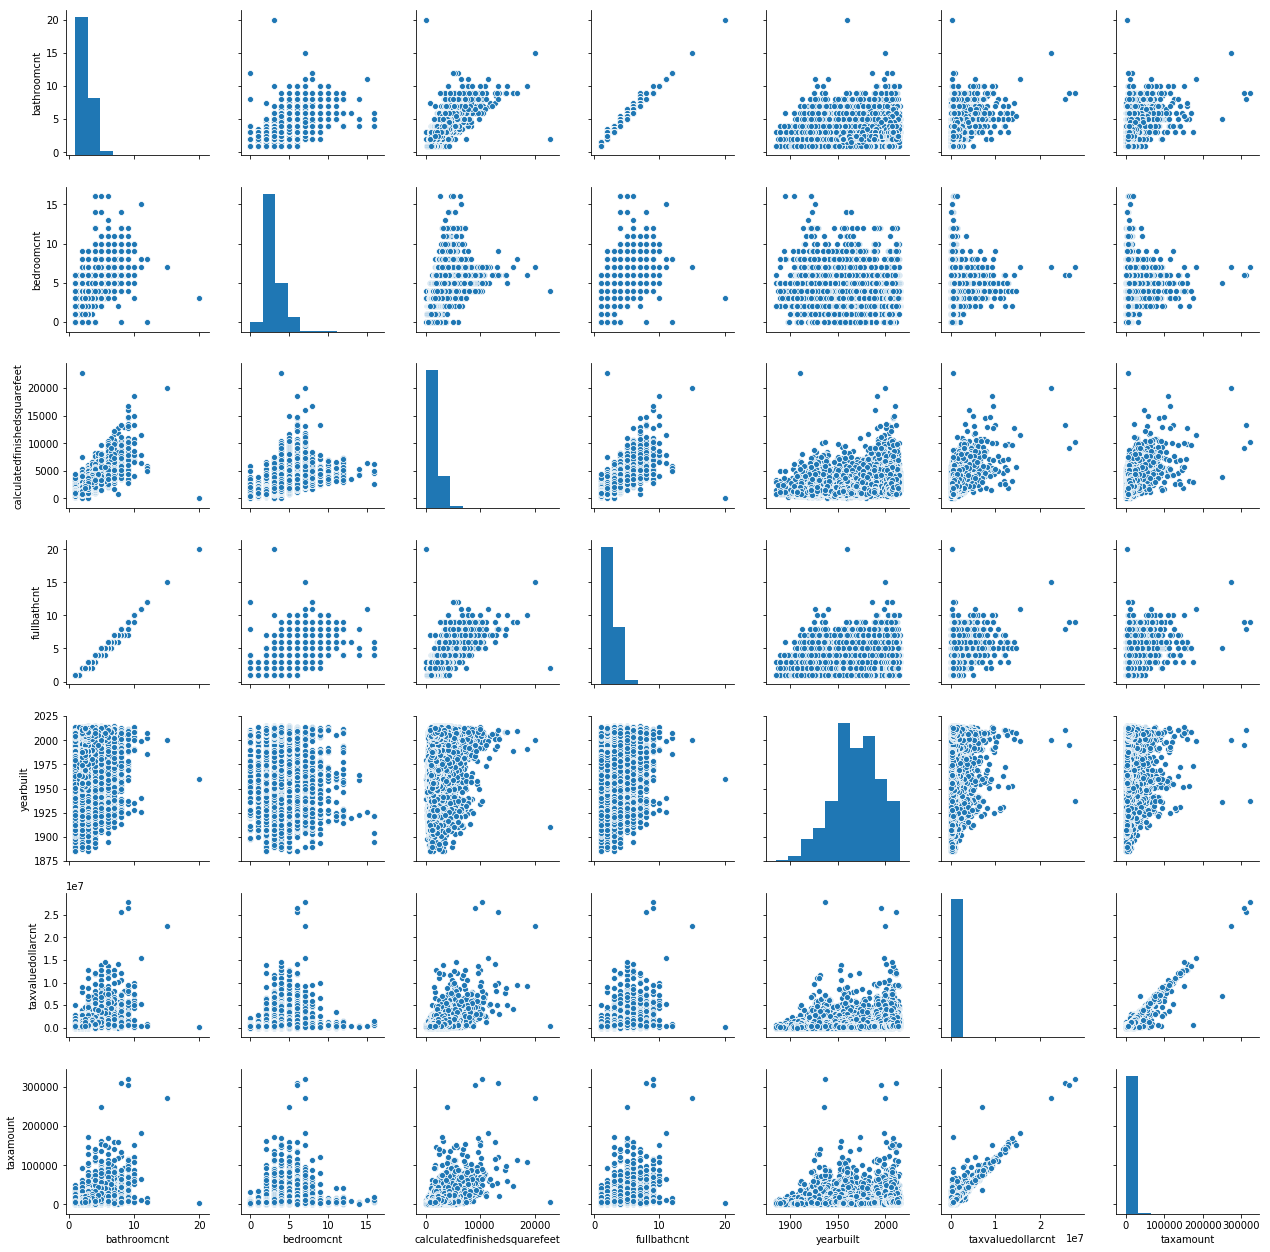

In [33]:
sns.pairplot(x_vars)

### Find NaN and > 0 

In [34]:
def percent_NaNs(df):
    cols = list(df.columns)
    Nans = {}
    for col in cols:
        Nans[col] = 'Missing {:0.2f}%'.format((df[col].isnull().sum()/df.shape[0]*100))
    return Nans

In [35]:
percent_NaNs(full_vars)

{'logerror': 'Missing 0.00%',
 'bathroomcnt': 'Missing 0.00%',
 'bedroomcnt': 'Missing 0.00%',
 'calculatedfinishedsquarefeet': 'Missing 0.00%',
 'fullbathcnt': 'Missing 0.00%',
 'yearbuilt': 'Missing 0.00%',
 'taxvaluedollarcnt': 'Missing 0.00%',
 'taxamount': 'Missing 0.00%'}

In [36]:
def percent_nonzero(full_vars):
    cols = list(df.columns)
    Zeros = {}
    for col in cols:
        Zeros[col] = 'non-zero-percent = {:0.2f}%'.format(((df[col]>0).sum()/df.shape[0]*100))
    return Zeros

In [37]:
percent_nonzero(df)

{'logerror': 'non-zero-percent = 55.17%',
 'bathroomcnt': 'non-zero-percent = 100.00%',
 'bedroomcnt': 'non-zero-percent = 99.69%',
 'calculatedfinishedsquarefeet': 'non-zero-percent = 100.00%',
 'fullbathcnt': 'non-zero-percent = 100.00%',
 'yearbuilt': 'non-zero-percent = 100.00%',
 'taxvaluedollarcnt': 'non-zero-percent = 100.00%',
 'taxamount': 'non-zero-percent = 100.00%'}

KeyboardInterrupt: 

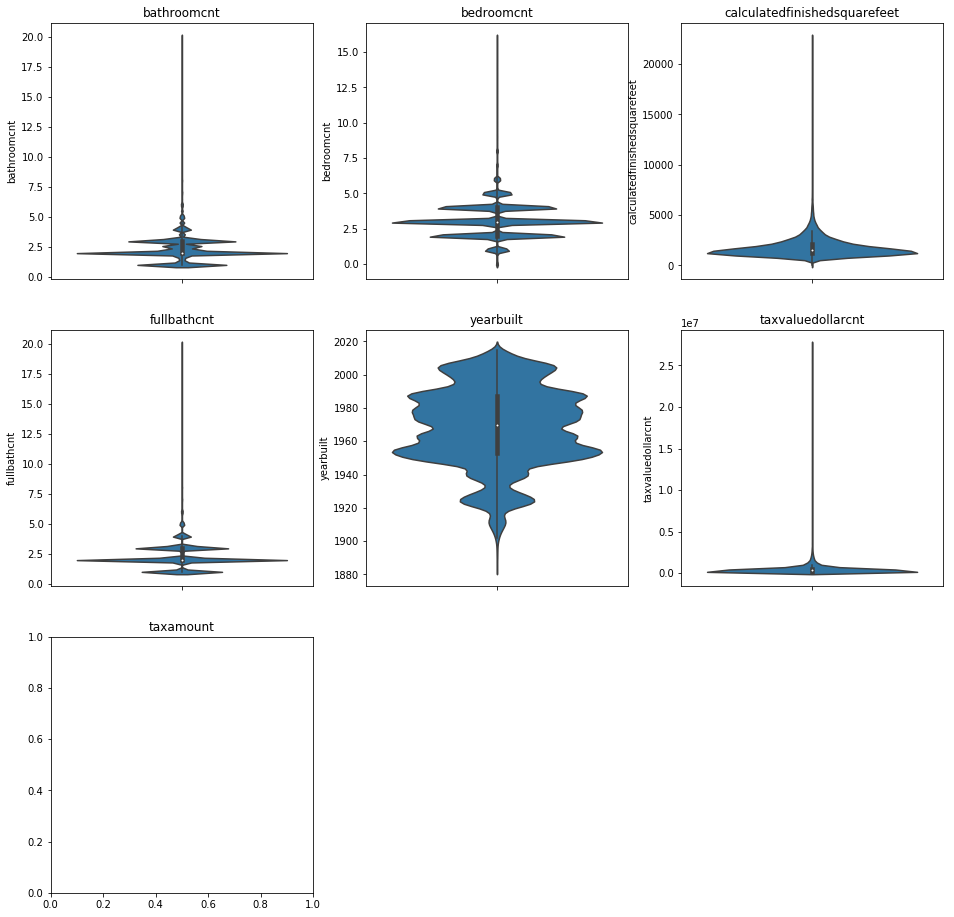

In [38]:
plt.figure(figsize=(16,16))

for i, col in enumerate(x_vars):
    plot_number = i + 1
    series = x_vars[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.violinplot(series, orient='v')

In [ ]:
def trimoutliers(df):
    df[df.apply(lambda x :(x-x.mean()).abs()<=(2*x.std()) ).all(1)]
    return df

In [ ]:
sns.pairplot(full_vars, diag_kind='reg')

### Trimming outliers

### Dropping fullbathcnt (aggregage)

In [ ]:
x_vars = x_vars.drop(columns=('fullbathcnt'))
full_vars = full_vars.drop(columns=('fullbathcnt'))


In [ ]:
print(x_vars.shape)
print(full_vars.shape)

In [ ]:
x_vars.describe()

In [ ]:
x_vars.head()

In [ ]:
new_x_vars = x_vars.copy()

for col in x_vars:
    q1 = x_vars[col].quantile(.03)
    q3 = x_vars[col].quantile(.97)
    new_x_vars = new_x_vars[(new_x_vars[col] >= q1) & (new_x_vars[col] <= q3)]

new_x_vars.shape

In [ ]:
df.shape

In [ ]:
new_full_vars = full_vars.copy()

for col in full_vars:
    q1 = full_vars[col].quantile(.03)
    q3 = full_vars[col].quantile(.97)
    new_full_vars = new_full_vars[(new_full_vars[col] >= q1) & (new_full_vars[col] <= q3)]

new_full_vars.shape

In [ ]:
new_full_vars.head()

In [ ]:
plt.figure(figsize=(16,16))

for i, col in enumerate(new_x_vars):
    plot_number = i + 1
    series = new_x_vars[col]
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.violinplot(series, orient='v')

In [ ]:
sns.heatmap(new_full_vars.corr(), cmap='PiYG', annot=True)

In [ ]:
plt.figure(figsize=(16,10))

for i, col in enumerate(new_full_vars.drop(columns=('logerror'))):
    plot_number = i + 1
    series = new_full_vars[col]
    plt.subplot(2,3,plot_number)
    plt.title(col)
    sns.distplot(series)

### Distribution looks much better after trimming top and bottom 3% out

### Time to split into test/train

In [ ]:
new_full_vars.shape

In [ ]:
X = new_full_vars.drop(['logerror'], axis=1)
print(X.head())

y = new_full_vars[['logerror']]
print(y.head())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.60, random_state=0)

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

In [ ]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

In [ ]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

In [ ]:
with sns.axes_style('white'):
    j = sns.jointplot("bathroomcnt", "logerror", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

In [ ]:
X_train.head()

In [ ]:
for i, col in enumerate(['bathroomcnt', 'bedroomcnt']):
    series = X[col]
    j2 = sns.jointplot(series, 'logerror', data=new_full_vars, kind='reg', height=5)
    j2.annotate(stats.pearsonr)

In [ ]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:
[[column, pearsonr(train[column], train.logerror)] for column in X_train] 

In [ ]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

In [ ]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

In [ ]:
X_train2 = X_train

In [ ]:
X_train2 = X_train.drop(columns=['bathroomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'])
# y_train2 = y_train.drop(columns=['bathroomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'])

In [ ]:
ols_model2 = sm.OLS(y_train, X_train2)
fit2 = ols_model2.fit()
fit2.summary()

In [ ]:
lm1 = LinearRegression()
print(lm1)

In [ ]:
X_train
# lm1.fit(X_train2, y_train)